In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
import math
from tensorflow.keras.utils import to_categorical
import os
import cv2
import seaborn as sns
from IPython.display import clear_output
import time
%matplotlib inline

C:\Users\Bjorn\anaconda3\envs\new_tf\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Bjorn\anaconda3\envs\new_tf\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [3]:
df = pd.read_csv(csv_path)
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [4]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70091 entries, 5 to 420545
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   p (mbar)         70091 non-null  float64
 1   T (degC)         70091 non-null  float64
 2   Tpot (K)         70091 non-null  float64
 3   Tdew (degC)      70091 non-null  float64
 4   rh (%)           70091 non-null  float64
 5   VPmax (mbar)     70091 non-null  float64
 6   VPact (mbar)     70091 non-null  float64
 7   VPdef (mbar)     70091 non-null  float64
 8   sh (g/kg)        70091 non-null  float64
 9   H2OC (mmol/mol)  70091 non-null  float64
 10  rho (g/m**3)     70091 non-null  float64
 11  wv (m/s)         70091 non-null  float64
 12  max. wv (m/s)    70091 non-null  float64
 13  wd (deg)         70091 non-null  float64
dtypes: float64(14)
memory usage: 7.5 MB


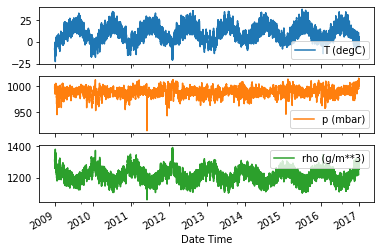

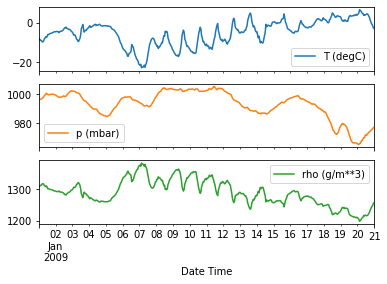

In [6]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [8]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
df['wv (m/s)'].min()

0.0

In [9]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

In [10]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [12]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

## Del inn trening/val/test

In [13]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [14]:
y_train = train_df["T (degC)"]
y_val = val_df["T (degC)"]
y_test = test_df["T (degC)"]

In [15]:
X_train = train_df.drop(columns="T (degC)")
X_val = val_df.drop(columns="T (degC)")
X_test = test_df.drop(columns="T (degC)")

In [16]:
train_mean = X_train.mean()
train_std = X_train.std()

X_train = (X_train - train_mean) / train_std
X_val = (X_val - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

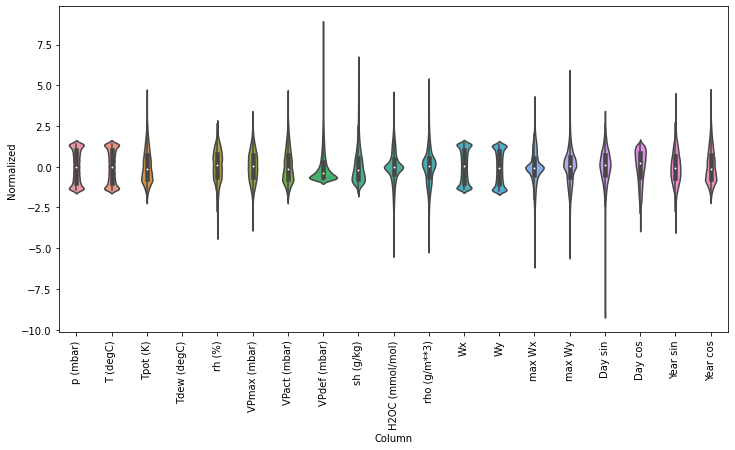

In [17]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [18]:
# Forskyvning mellom sensordata og prediksjon

TIDSFORSKYVNING = 24 * 1

In [19]:
y_train = y_train[TIDSFORSKYVNING:]
y_val = y_val[TIDSFORSKYVNING:]
#y_test = y_test[TIDSFORSKYVNING:]

In [20]:
X_train = X_train[:-TIDSFORSKYVNING]
X_val = X_val[:-TIDSFORSKYVNING]
#X_test = X_test[:-TIDSFORSKYVNING]

In [21]:
y_train.shape

(49039,)

In [22]:
X_train.shape

(49039, 18)

In [23]:
X_train = np.expand_dims(X_train,1)
X_val = np.expand_dims(X_val,1)
X_test = np.expand_dims(X_test,1)

In [24]:
y_train = np.expand_dims(y_train,-1)
y_val = np.expand_dims(y_val,-1)
y_test = np.expand_dims(y_test,-1)

In [25]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1,activation="linear")
])

In [26]:
lstm_model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = [tf.keras.metrics.MeanAbsoluteError()])

In [27]:
lstm_model.fit(x=X_train,y=y_train, epochs=10, batch_size=10, validation_data=(X_val,y_val))

Epoch 1/10
4904/4904 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 113.3148 - mean_absolute_error: 8.8380 - val_loss: 28.8733 - val_mean_absolute_error: 4.2400
Epoch 2/10
4904/4904 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 25.0946 - mean_absolute_error: 3.9880 - val_loss: 12.5098 - val_mean_absolute_error: 2.7205
Epoch 3/10
4904/4904 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 13.6497 - mean_absolute_error: 2.8008 - val_loss: 10.5574 - val_mean_absolute_error: 2.5197
Epoch 4/10
4904/4904 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 10.4480 - mean_absolute_error: 2.4913 - val_loss: 10.0734 - val_mean_absolute_error: 2.4720
Epoch 5/10
4904/4904 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 9.7045 - mean_absolute_error: 2.4154 - val_loss: 9.6595 - val_mean_absolute_error: 2.4232
Epoch 6/10
4904/4904 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 9.3561 - mean_absolute_error: 2.3699 - val_loss: 9.4475 - val_mean_absolute_error: 2.3976
Epoch 7/10
4904/4904 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 8.9431 - m

In [28]:
pred_tid = len(X_test)

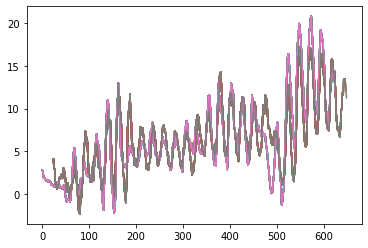

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


KeyboardInterrupt: 

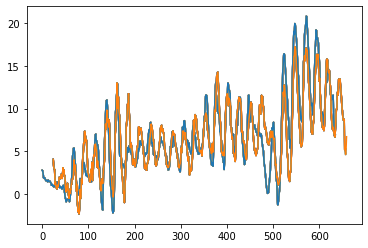

In [29]:
%matplotlib inline
for i in range(pred_tid):

    plt.plot(y_test[:i+1], label="Faktisk temp")
    plt.plot(np.arange(TIDSFORSKYVNING,TIDSFORSKYVNING+i+1) , lstm_model.predict(X_test[:i+1]).ravel(), label="predikert temp")
    if i % 24 == 0:
        clear_output(wait=True)
        plt.show()
        time.sleep(0.5)
    